In [4]:
!pip install pandas

In [5]:
!pip install seaborn

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [7]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [8]:
df = pd.read_csv("wine.csv")


In [9]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
df.isna()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [13]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


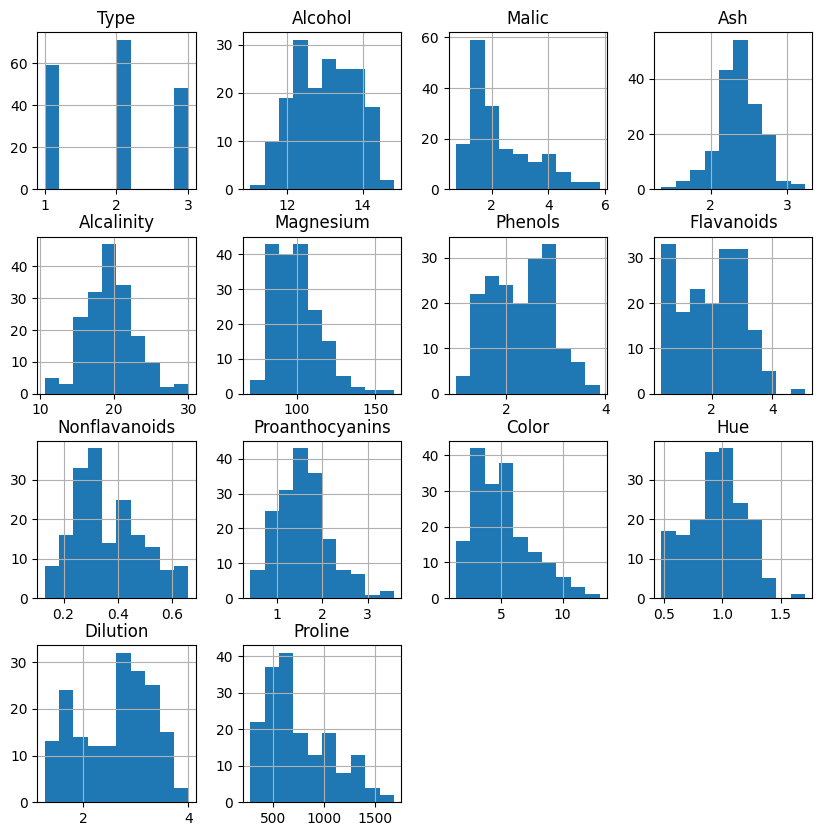

In [14]:
df.hist(figsize=(10,10))
plt.show()

In [15]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [16]:
df['Type'].nunique()

3

In [17]:
df['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [18]:
## normalizing the numerical data
std = StandardScaler()
wine_normal = std.fit_transform(df)
wine_normal

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [19]:
## model building
pca = PCA
from sklearn.decomposition import PCA
pca = PCA()

In [20]:
pca_components = pca.fit_transform(wine_normal)

In [21]:
pca.explained_variance_

array([5.56722458, 2.51118402, 1.45424413, 0.9331603 , 0.88246016,
       0.67657935, 0.55692777, 0.35201176, 0.29620602, 0.26378805,
       0.2271244 , 0.16975037, 0.13029618, 0.05813894])

In [22]:
## in percentage the amount of variance that each PCA explains is   ## convert it into percenttage
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [23]:
## cumulative pecentage / variance
var1 = np.cumsum(np.round(var,decimals=4)*100)

var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

In [24]:
## 6 dimensional componenets
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

In [25]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

In [26]:
## linear combination equation constant values are taken from above array o/p
## PCA1 =  -0.45*SAT - 0.427*TOP10 + 0.42*Accept + 0.39*SFRatio - 0.36*Expenses - 0.37*graderate

## thus all 6 principle components can be calculated using 6 values

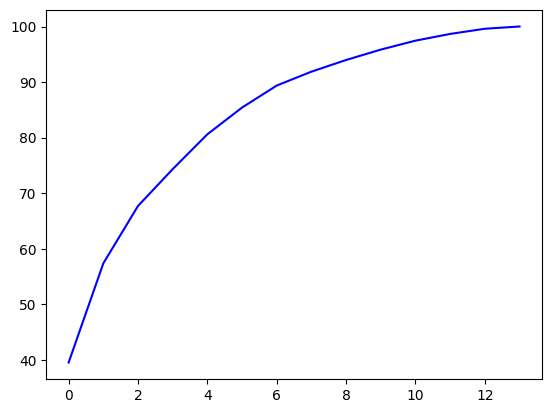

In [27]:
## variance plot for PCA componenets obtained
plt.plot(var1, color="Blue")

In [28]:
## why scatter plot ?
  #                   == after appliying pca there should not be any correlation.thus multicollinearity is removed or not that you can cross checck.

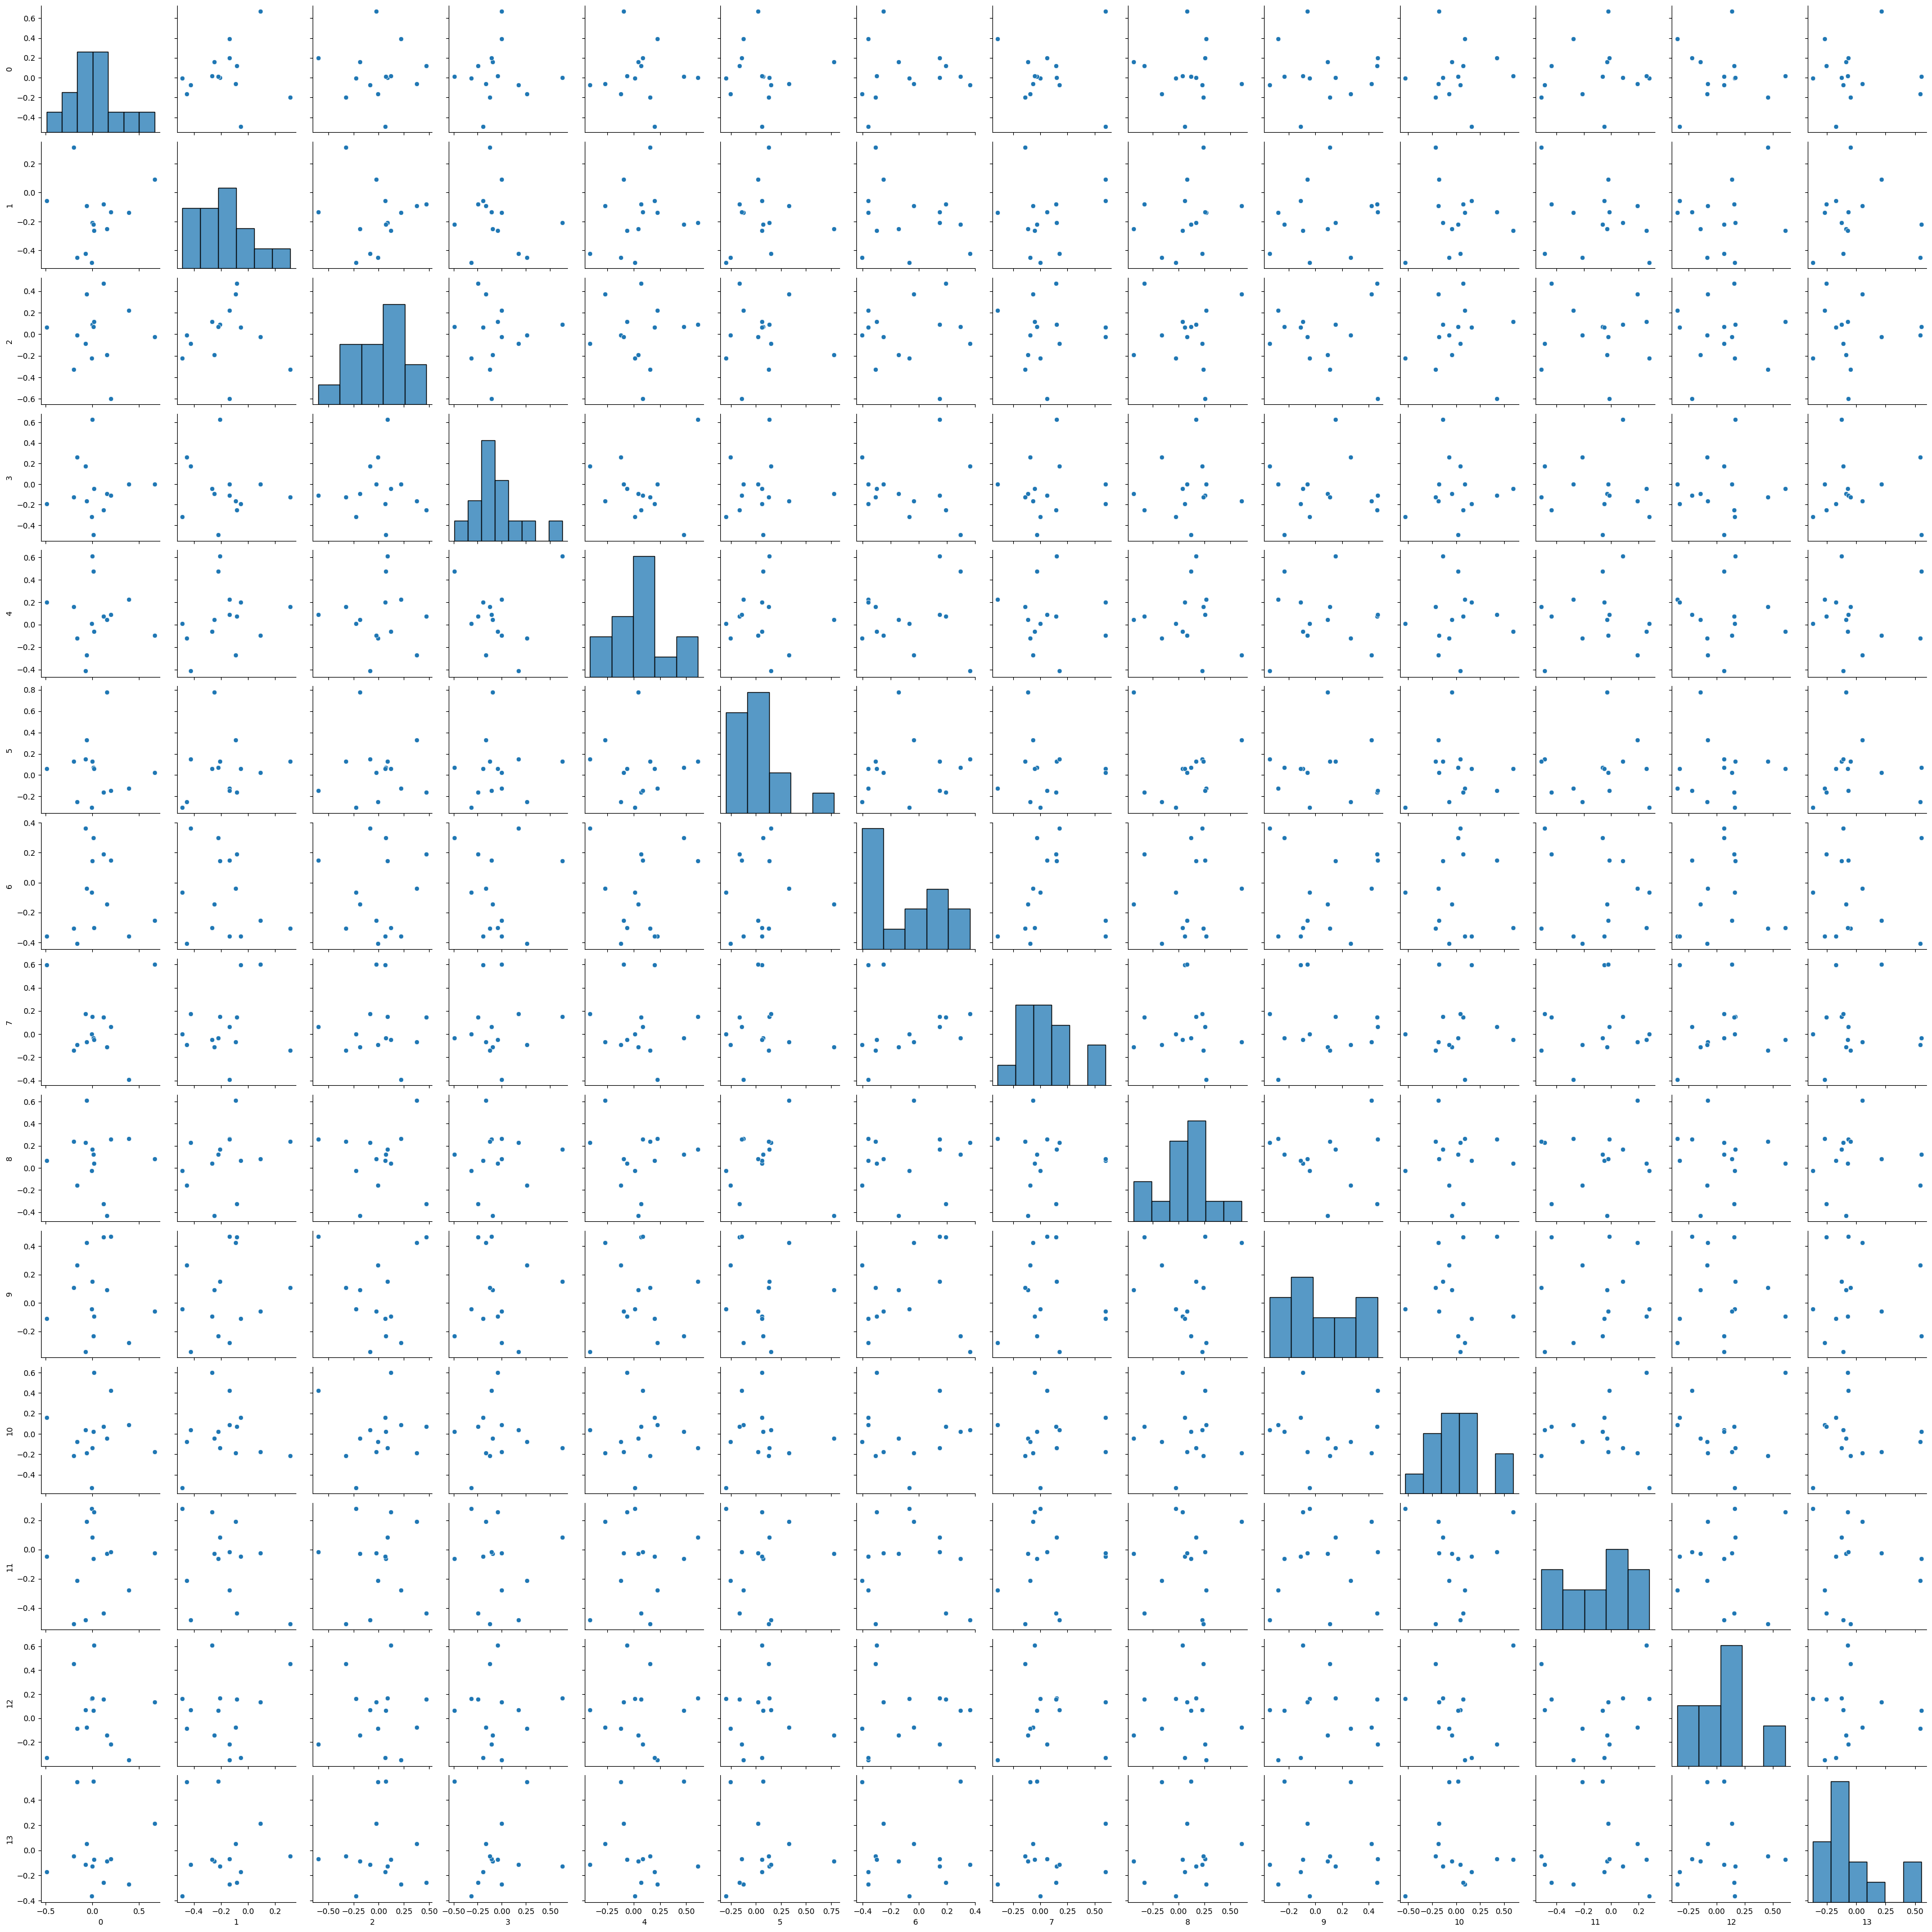

In [29]:
import pandas as pd

pca_df = pd.DataFrame(pca.components_)
sns.pairplot(pca_df)

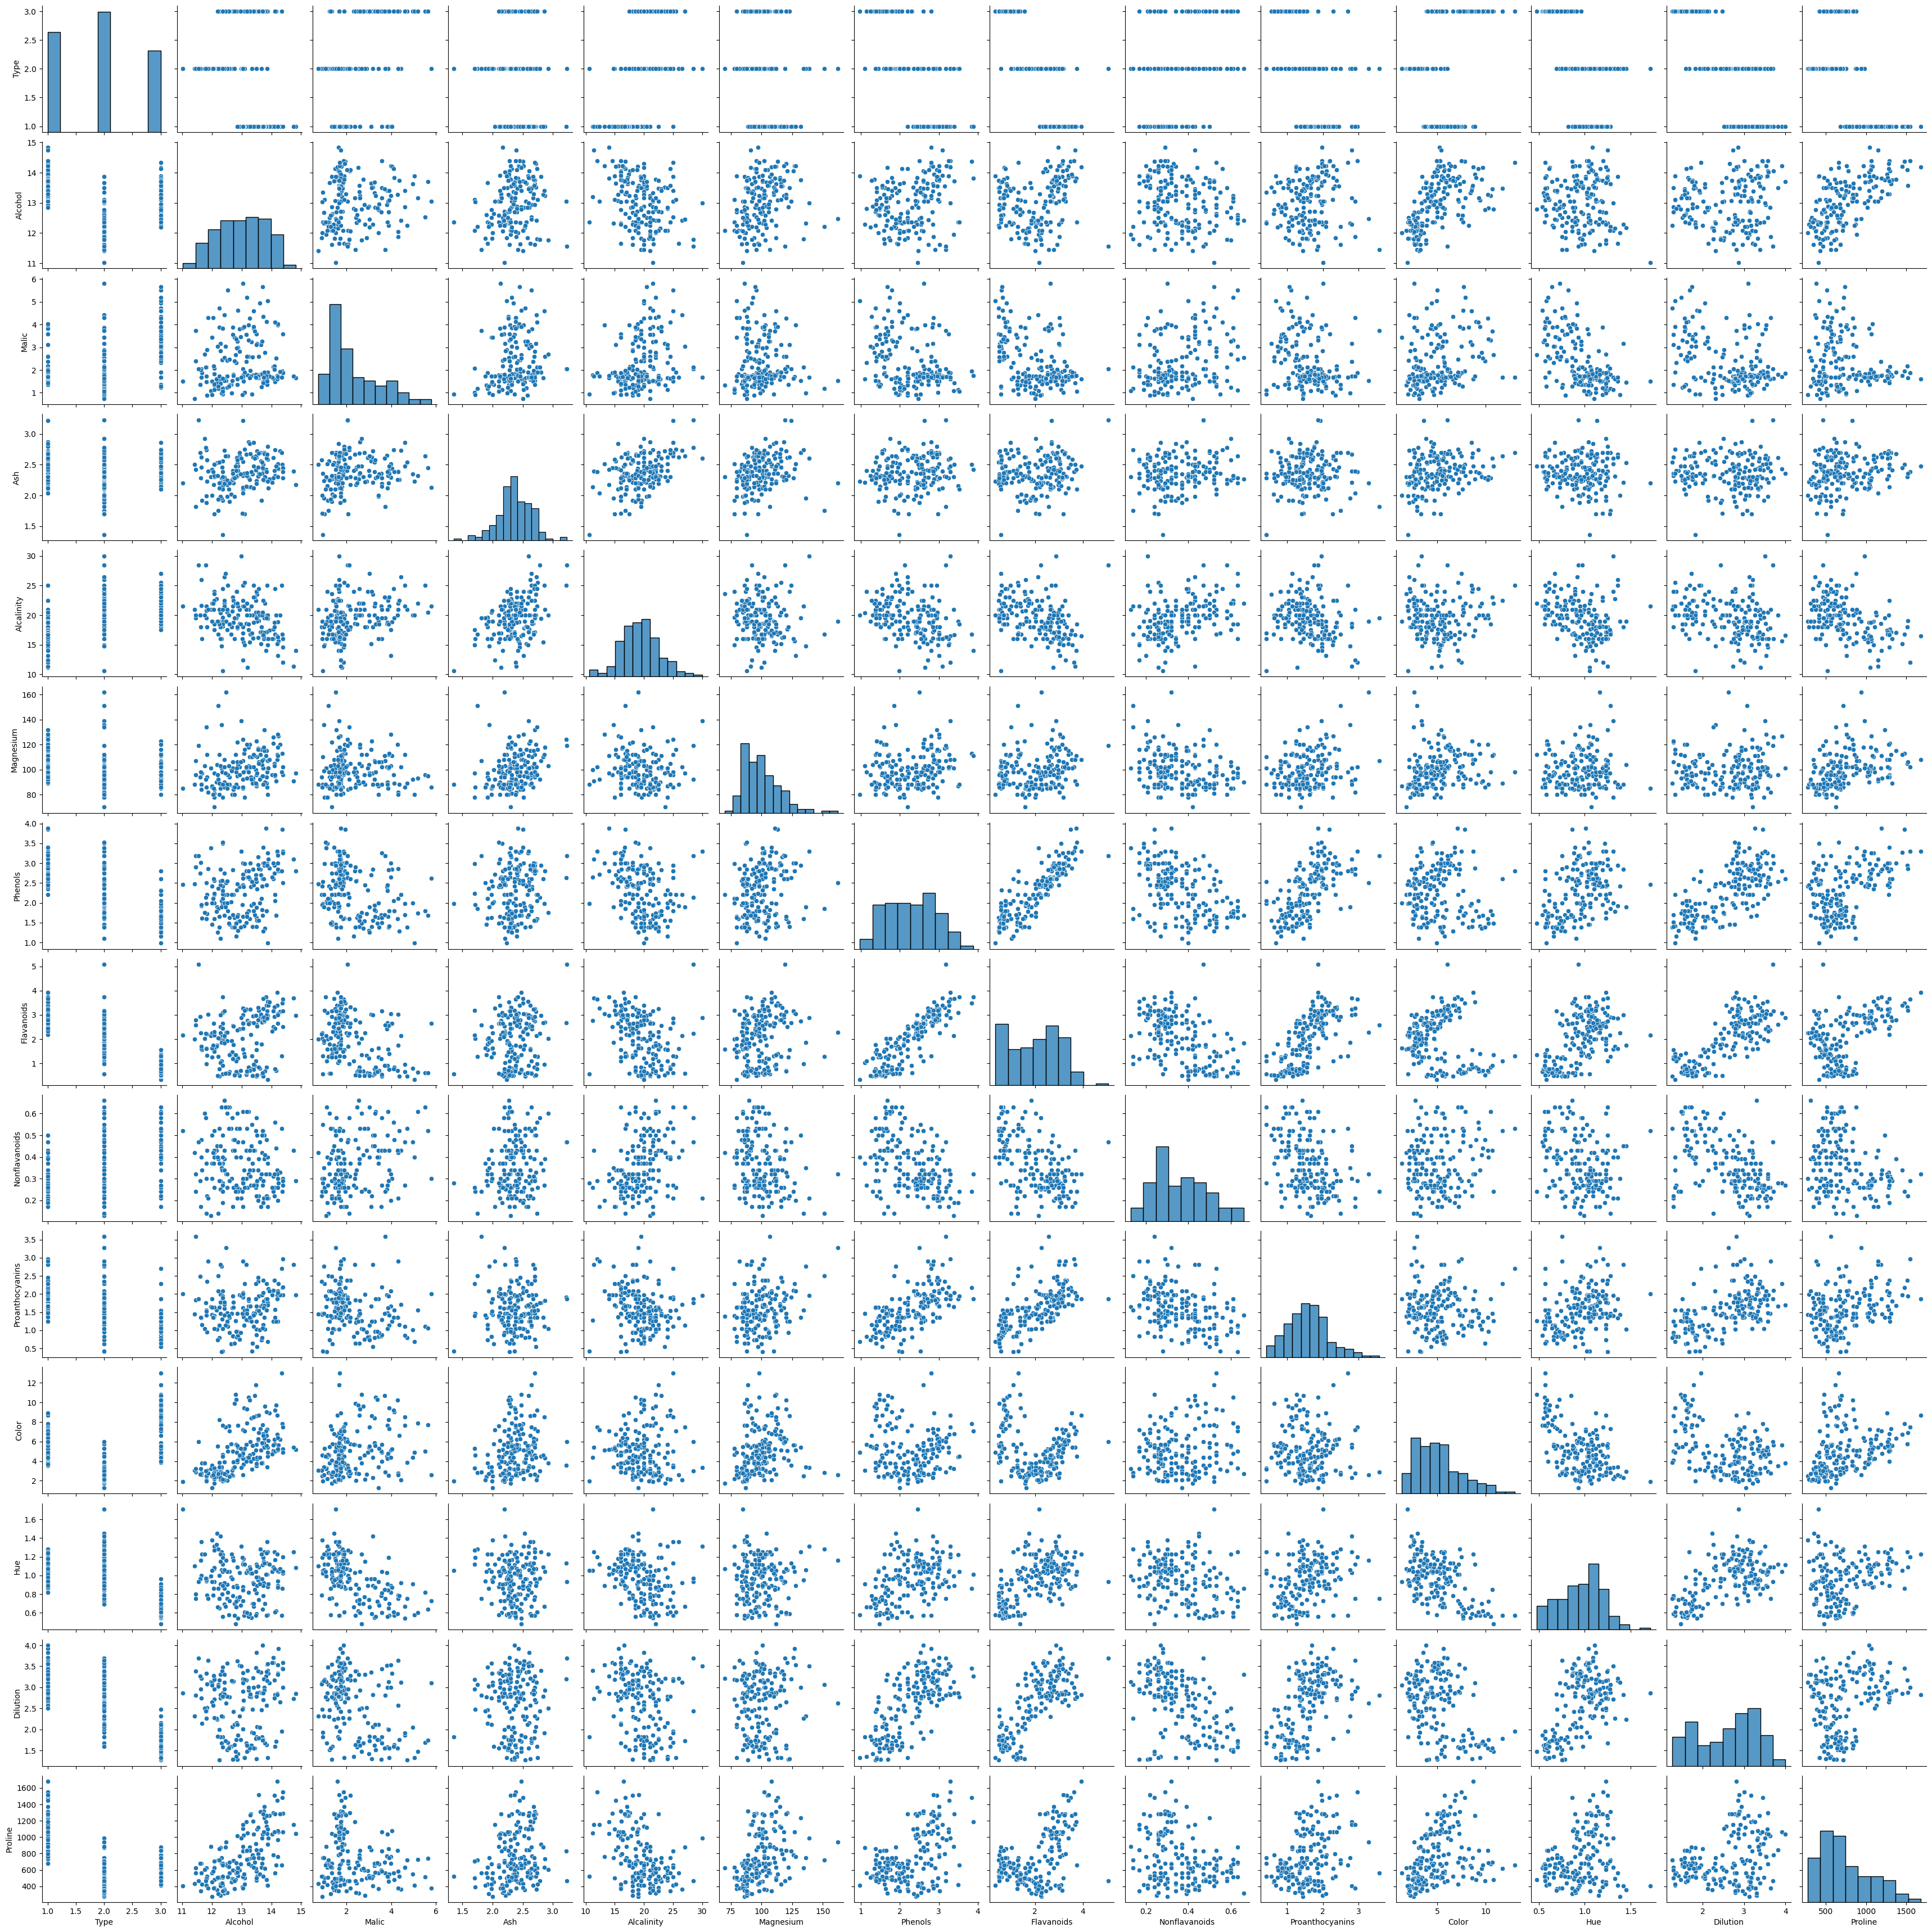

In [30]:
sns.pairplot(df)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [38]:
df.head(4)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


In [52]:
# prompt: Using dataframe df: bar

import altair as alt
alt.Chart(df).mark_bar().encode(x='Type', y='Alcohol')


alt.Chart(...)

In [46]:
# Create a DataFrame
wine_df = pd.DataFrame(df, columns=df.Type)
wine_df['Type'] = df.Type

In [47]:
scaler = StandardScaler()

In [56]:
wine_df = df.iloc[:, 0]
wine_df = df.iloc[:, 0:2]

In [57]:
df['new_column'] = 0

In [58]:
wine_scaled = scaler.fit_transform(wine_df.drop(columns=['Type']))

In [60]:
wine_df = df.iloc[:, 1:14]  # Select multiple columns for PCA
wine_scaled = scaler.fit_transform(wine_df)

In [61]:
# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization purposes
wine_pca = pca.fit_transform(wine_scaled)

In [62]:
# Hierarchical clustering
linked = linkage(wine_pca, method='ward')

In [65]:
wine_df = df.iloc[:, :]  # Select all columns

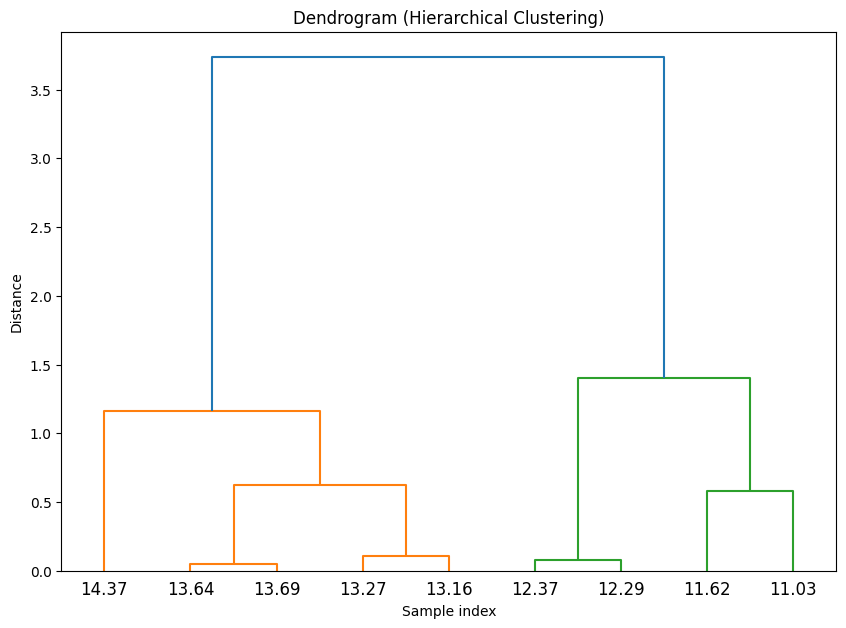

In [66]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=wine_df['Alcohol'].values)  # Use the 'Alcohol' column for the labels
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()